In [13]:
#!pip install pandas-datareader

#import sys
#!{sys.executable} -m pip install pmdarima

#!conda config --add channels conda-forge
#!conda config --set channel_priority strict
#!conda install pmdarima

In [3]:
# Librerias #

# Loading Libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy import stats
from pandas_datareader import data

import statsmodels.api as sm
#import pmdarima as pmd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)

# MODULO 1: INTRODUCCION A PYTHON y MODELOS UNIVARIADOS

### I.2. Base de datos con mas de una variable 

En esta seccion mostraremos una manera de obtener mas de una variable a la vez.
Aqui se requiere que los datos esten en la misma frecuencia (mes, trimestre, etc.)

In [4]:
# Ejemplo 1: Obtener una variable a la vez
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['PN01271PM','PN01276PM','PN09816PM',] 
form_out  = '/json'
period    = '/2003-01/2024-03'

month_s = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Set','Oct','Nov','Dic']
month_d = ['01','02','03','04','05','06','07','08','09','10','11','12']

df1 = pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']
    
    value = []
    dates = []
    
    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(float(aux_val[0]))
    
    dict_aux = {'Fecha' : dates, 
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
    for (s,d) in zip(month_s,month_d):
        df_aux['Fecha'] = df_aux['Fecha'].str.replace(s,d)
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])

    
    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df1    = pd.concat([df1, df_aux], axis=1)

df1
# df1.to_csv('FrecuenciaDiariaNueva.csv')



,Índice de precios Lima Metropolitana (var% mensual) - IPC,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía
Fecha,,,
2003-01-01,0.231420,-0.111733,0.506054
2003-02-01,0.468825,0.228145,0.722192
2003-03-01,1.117780,1.938313,0.357386
2003-04-01,-0.050857,0.264059,-0.265865
2003-05-01,-0.032025,0.055604,-0.139973
...,...,...,...
2023-11-01,-0.163061,0.003387,-0.354821
2023-12-01,0.405778,0.357848,0.461352
2024-01-01,0.019211,0.009075,0.030675


In [6]:
df1.shape

(255, 3)

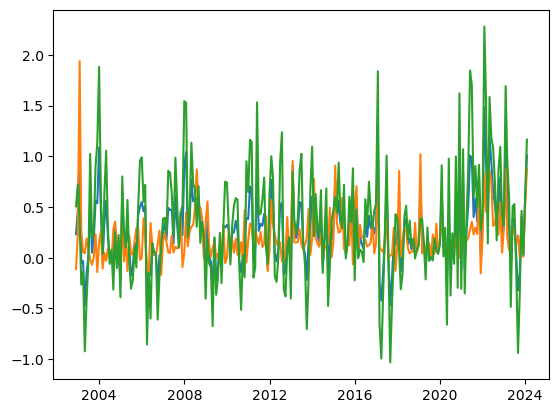

In [7]:
start_date = np.datetime64('2003-01')
end_date = np.datetime64('2024-03')
time = np.arange(start_date-1, end_date, dtype='datetime64[M]')


matrix = df1.values
IPC = matrix

plt.plot(time, IPC)


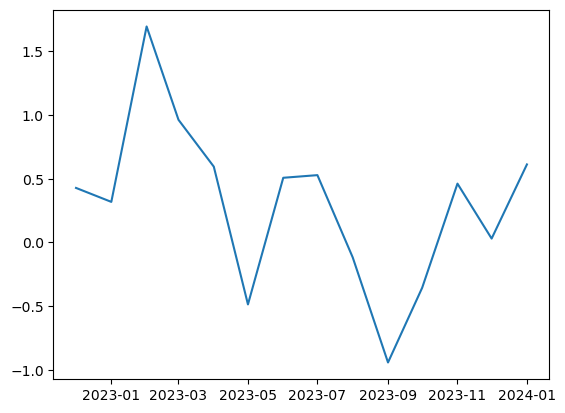

In [12]:
plt.plot(time[240:254], IPC[240:254,2])

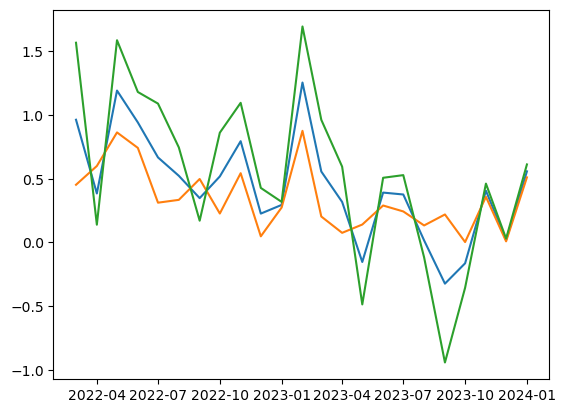

In [8]:
plt.plot(time[231:254], IPC[231:254,:])

In [ ]:
'Índice de precios Lima Metropolitana (var% mensual) - IPC'

In [ ]:
# Crear un diccionario con los nuevos nombres de las columnas

nuevos_nombres = {
    'Índice de precios Lima Metropolitana (var% mensual) - IPC': 'IPC',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía': 'IPC Sin Alimentos y Energía',
    'Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía': 'IPC Alimentos y Energía'
}
# Renombrar las columnas utilizando el diccionario
df1.rename(columns=nuevos_nombres, inplace=True)

# Mostrar la tabla con los nombres de las columnas renombrados
print(df1)


# Crear un diccionario con los nuevos nombres de las columnas




            IPC  IPC Sin Alimentos y Energía  IPC Alimentos y Energía
Fecha                                                                
2003-01-01  NaN                          NaN                      NaN
2003-02-01  NaN                          NaN                      NaN
2003-03-01  NaN                          NaN                      NaN
2003-04-01  NaN                          NaN                      NaN
2003-05-01  NaN                          NaN                      NaN
...         ...                          ...                      ...
2023-11-01  NaN                          NaN                      NaN
2023-12-01  NaN                          NaN                      NaN
2024-01-01  NaN                          NaN                      NaN
2024-02-01  NaN                          NaN                      NaN
2024-03-01  NaN                          NaN                      NaN

[255 rows x 3 columns]


In [ ]:
# Obtener el índice de las columnas originales
index = df1.columns

# Crear un diccionario con los nuevos nombres de las columnas
names = {
    index[0]: 'IPC',
    index[1]: 'IPC_SAE',
    index[2]: 'IPC_Subyacente'
}

# Renombrar las columnas utilizando loc
df1.loc[:, names.keys()] = df1.loc[:, names.keys()].rename(columns=names)

# Mostrar la tabla con los nombres de las columnas renombrados
print(df1)


            Índice de precios Lima Metropolitana (var% mensual) - IPC  \
Fecha                                                                   
2003-01-01                                                NaN           
2003-02-01                                                NaN           
2003-03-01                                                NaN           
2003-04-01                                                NaN           
2003-05-01                                                NaN           
...                                                       ...           
2023-11-01                                                NaN           
2023-12-01                                                NaN           
2024-01-01                                                NaN           
2024-02-01                                                NaN           
2024-03-01                                                NaN           

            Índice de precios Lima Metropolitana (

In [ ]:
tabla = df1
nuevos_nombres = {
    0: 'IPC',
    1: 'IPC Sin Alimentos y Energía',
    2: 'IPC Alimentos y Energía'
}

# Renombrar las columnas utilizando iloc
tabla.columns = [nuevos_nombres.get(idx, col) for idx, col in enumerate(tabla.columns)]

# Mostrar la tabla con los nombres de las columnas renombrados
print(tabla)

            IPC  IPC Sin Alimentos y Energía  IPC Alimentos y Energía
Fecha                                                                
2003-01-01  NaN                          NaN                      NaN
2003-02-01  NaN                          NaN                      NaN
2003-03-01  NaN                          NaN                      NaN
2003-04-01  NaN                          NaN                      NaN
2003-05-01  NaN                          NaN                      NaN
...         ...                          ...                      ...
2023-11-01  NaN                          NaN                      NaN
2023-12-01  NaN                          NaN                      NaN
2024-01-01  NaN                          NaN                      NaN
2024-02-01  NaN                          NaN                      NaN
2024-03-01  NaN                          NaN                      NaN

[255 rows x 3 columns]
